# Factors Affecting Online Education System Performance
## by Oluwafemi Abiona

## Investigation Overview
In this investigation, I wanted to look at the factors that had direct effect on the `Online education system based on the satisfactory level of the learners`. Some of the features that were considered closely are: 
- Internet facility in your locality
- Your interaction in online mode
- Clearing doubts with faculties in online mode
- Have separate room for studying?
- Are you involved in any sports
- Do elderly people monitor you?
- Home Location
- Study time (Hours)
- Online performance

## Dataset Overview
This dataset aims to analyze the impact of online education by checking out the satisfactory level of the learners with respect to certain features including internet facility, study time (Hours), gender, online performance and other features. The dataset can be found here:
https://www.kaggle.com/datasets/sujaradha/online-education-system-review.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12,4)
plt.rcParams["figure.dpi"] = 144
pd.set_option('display.max_columns', 30)
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load in the dataset into a pandas dataframe
online_review = pd.read_csv('ONLINE EDUCATION SYSTEM REVIEW CLEAN.csv')

In [3]:
# convert the cols above into ordered categorical types
ordinal_var_dict = {'Internet facility': ['very_bad','bad','fair','good','very_good'],
                    'Online mode interaction': ['very_bad','bad','fair','good','very_good'],
                    'Clearing doubts with faculties in online mode': ['very_bad','bad','fair','good','very_good'],
                  'Satifaction level in O.E': ['Bad', 'Average', 'Good']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    online_review[var] = online_review[var].astype(ordered_var)

### Distribution of Satifaction level in Online Education

A closer look at our variable of interest (satisfactory level) it can be observed that more than 50% of the participants satisfactory level was average. This report will proceed to share some insight of the posile cause

Average    52.371733
Good       24.298161
Bad        23.330106
Name: Satifaction level in O.E, dtype: float64


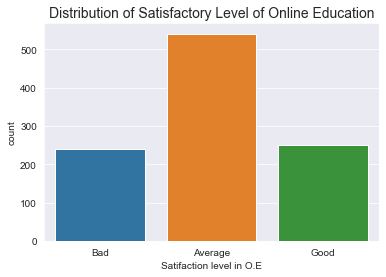

In [4]:
print(online_review['Satifaction level in O.E'].value_counts(normalize=True)*100)
sns.countplot(data=online_review, x='Satifaction level in O.E')
plt.title('Distribution of Satisfactory Level of Online Education', fontsize=14);

### Home Location Distribution

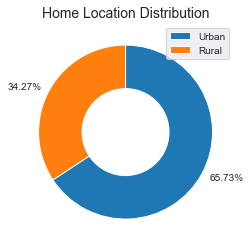

In [5]:
gendercount = round(online_review['Home Location'].value_counts(normalize=True)*100,2)
plt.pie(gendercount, labels=[f"{str(x)}%" for x in gendercount.values], startangle=90, counterclock = False, wedgeprops = {'width': 0.5});
plt.title('Home Location Distribution', fontsize=14)
plt.legend(gendercount.index);

### Plot of Online performance versus Satisfaction level in online education

From the violinplot below we can observe that the feedback on satisfaction level is subjective to the individuals involved, while the average score from the satisfaction level Bad is 60%, we have that for average as 70% and Good as 80%. Whereas they were individuals withh 100% in all satisfaction.

Text(0.5, 1.0, 'Online performance versus Satisfaction level in online education')

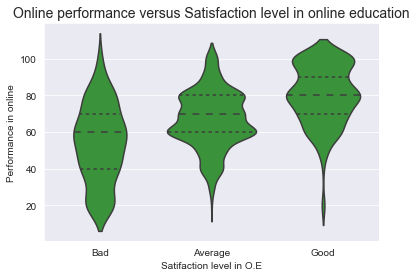

In [6]:
color_base= sns.color_palette()[2]
sns.violinplot(data=online_review, x = 'Satifaction level in O.E', y= 'Performance in online',color=color_base, inner='quartiles')
plt.title('Online performance versus Satisfaction level in online education', fontsize=14)

### Plot of Internet facility, Online mode interaction & Clearing doubts with faculties against Satisfaction level

- For the internet facility feature compared to satisfaction level, we can see that there was a low participation in the `very_bad` and `bad` locations which increased from `fair` to `very good`, this tells as that most individuals couldn't partake in the online education system due to their internet situation. While the average satisfaction level seems to be quite dominant accross it suggest that internet facilty is not an absolute determinant of the satisfaction level.

- From the chart of Clearing doubts with faculties in online mode & Online mode interaction, it can be noticed that the `bad` satisfaction level decrease progressively along the scale `very_bad` - `good`, and was completely absent in the very_good scale. This will suggest that both are key factors affecting satisfaction levels in the online education scheme.

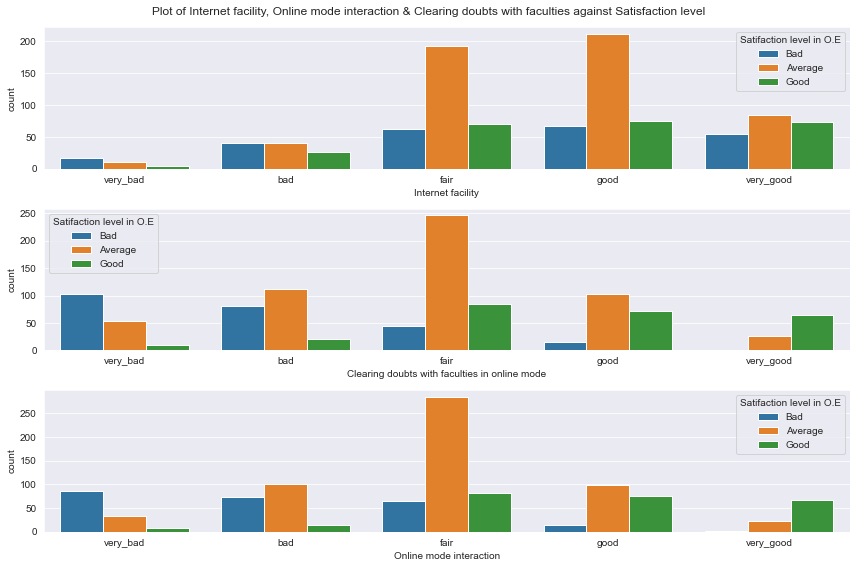

In [7]:
fig, ax = plt.subplots(nrows=3, figsize = [12,8])

sns.countplot(data=online_review, x='Internet facility', hue='Satifaction level in O.E',  ax=ax[0])
sns.countplot(data=online_review, x='Clearing doubts with faculties in online mode', hue='Satifaction level in O.E', ax=ax[1])
sns.countplot(data=online_review, x='Online mode interaction', hue='Satifaction level in O.E', ax=ax[2])
fig.suptitle('Plot of Internet facility, Online mode interaction & Clearing doubts with faculties against Satisfaction level')
plt.tight_layout();

### Correlation between Satisfaction level in Online Education, Online performance and those monitored by elderly people

- The result of the correlation plot shows a level of increase aove the 60% online performance score for students who had elderly people monitor them (we could liken that to mentor or offline instructors)

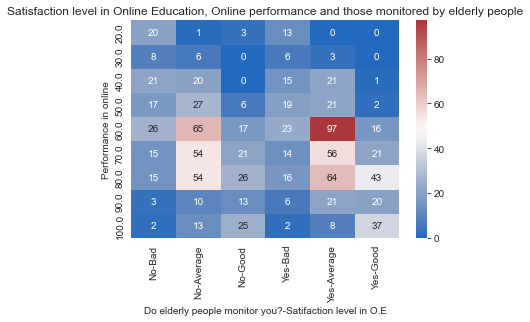

In [8]:
# Grouping data using Satisfaction level, Online performance and Do elderly people monitor you?
grouped = online_review.groupby([online_review['Performance in online'], 'Do elderly people monitor you?', 'Satifaction level in O.E']).size().reset_index(name='count')
# Fixing dataset layout
grouped = grouped.pivot(index='Performance in online', columns=['Do elderly people monitor you?', 'Satifaction level in O.E'], values = 'count').dropna()
# Plotting the heatmap
plot = sns.heatmap(grouped, annot=True, cmap='vlag').set(title='Satisfaction level in Online Education, Online performance and those monitored by elderly people');

### Correlation between Satisfaction level in Online Education, Online performance and those that have separate room for studying

- The result of the correlation plot shows a level of increase aove the 60% online performance score for students who had  separate room for studying.

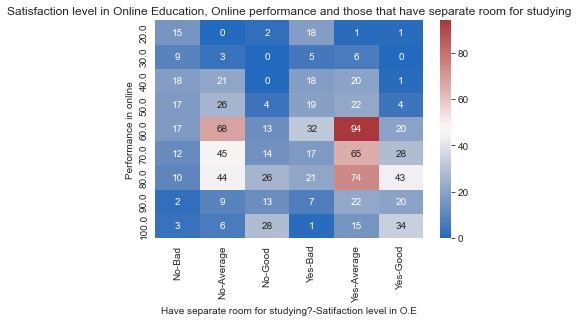

In [9]:
# Grouping data using Satisfaction level, Online performance and those that have separate room for studying
grouped_2 = online_review.groupby([online_review['Performance in online'], 'Have separate room for studying?', 'Satifaction level in O.E']).size().reset_index(name='count')
grouped_2 = grouped_2.pivot(index='Performance in online', columns=['Have separate room for studying?', 'Satifaction level in O.E'], values = 'count')

# Plotting the heatmap
plot = sns.heatmap(grouped_2, annot=True, cmap='vlag').set(title='Satisfaction level in Online Education, Online performance and those that have separate room for studying');

### Correlation between Satisfaction level in Online Education, Online performance and those that are involved in any sports

- The result of the correlation plot shows a level of increase aove the 60% online performance score for students who were not involved in any sports with focus on the `average` and `good` satisfaction levels

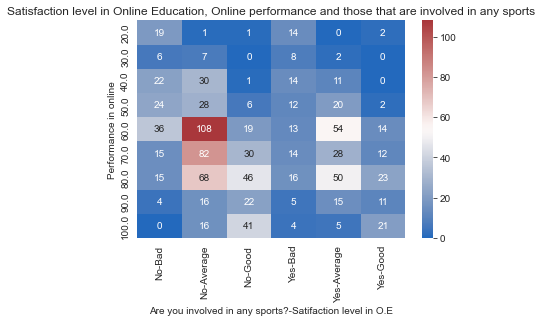

In [10]:
# Grouping data using Satisfaction level, Online performance and those that are involved in any sports
grouped_3 = online_review.groupby([online_review['Performance in online'], 'Are you involved in any sports?', 'Satifaction level in O.E']).size().reset_index(name='count')
grouped_3 = grouped_3.pivot(index='Performance in online', columns=['Are you involved in any sports?', 'Satifaction level in O.E'], values = 'count')

# Plotting the heatmap
plot = sns.heatmap(grouped_3, annot=True, fmt='.0f', cmap='vlag').set(title='Satisfaction level in Online Education, Online performance and those that are involved in any sports');

### Plot of Online performance against Satifaction level in Online Education for each Gender

Despite the distribution of male gender being higher than the female, the chart below shows that the female gender performed better across all satisfactory level also.  

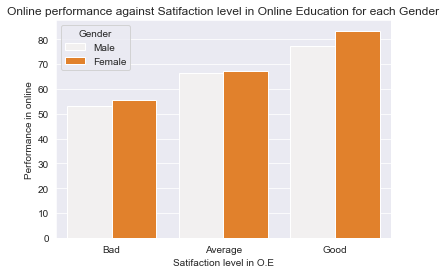

In [11]:
color_base1= sns.color_palette()[1]
sns.barplot(data=online_review, x = 'Satifaction level in O.E', y= 'Performance in online',hue='Gender',color=color_base1, ci=None).set(title='Online performance against Satifaction level in Online Education for each Gender');

In [12]:
!jupyter nbconvert Commuicate_Data_Findings_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Commuicate_Data_Findings_Slide_Deck.ipynb to slides
[NbConvertApp] Writing 806152 bytes to Commuicate_Data_Findings_Slide_Deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Dave\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Dave\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Dave\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Dave\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\Dave\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_noteboo